<a href="https://colab.research.google.com/github/0xpix/Road-Sign-Tiny-VGG-architecture/blob/main/road_sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od

# GTSRB - German Traffic Sign Recognition Dataset by Mykola
od.download(
	"https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nschlfat
Your Kaggle Key: ··········


100%|██████████| 612M/612M [00:04<00:00, 136MB/s]


In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Tensorflow
import tensorflow as tf
from keras.utils import load_img, img_to_array
from keras.optimizers import Adam
from keras import layers, models

In [4]:
train_data = pd.read_csv('gtsrb-german-traffic-sign/Train.csv')
test_data = pd.read_csv('gtsrb-german-traffic-sign/Test.csv')

In [5]:
labels = {0:'Speed limit(20km/h)',
          1:'Speed limit(30km/h)',
          2:'Speed limit(50km/h)',
          3:'Speed limit(60km/h)',
          4:'Speed limit(70km/h)',
          5:'Speed limit(80km/h)',
          6:'End of speed limit(80km/h)',
          7:'Speed limit(100km/h)',
          8:'Speed limit(120km/h)',
          9:'No passing',
          10:'No passing for vehicles over 3.5 metric tons',
          11:'Right-of-way at the next intersection',
          12:'Priority road',
          13:'Yield',
          14:'Stop',
          15:'No vehicles',
          16:'Vehicles over 3.5 metric tons prohibted',
          17:'No entry',
          18:'General caution',
          19:'Dangerous curve to the left',
          20:'Dangerous curve to the right',
          21:'Double curve',
          22:'Bumpy road',
          23:'Slippery road',
          24:'Road narrows on the right',
          25:'Road work',
          26:'Traffic signals',
          27:'Pedestrians',
          28:'Children crossing',
          29:'Bicycles crossing',
          30:'Beware of ice/snow',
          31:'Wild animals crossing',
          32:'End of all speed and passing limits',
          33:'Turn right ahead',
          34:'Turn left ahead',
          35:'Ahead only',
          36:'Go straight or right',
          37:'Go straight or left',
          38:'Keep right',
          39:'Keep left',
          40:'Roundabout mandatory',
          41:'End of no passing',
          42:'End of no passing by vehicles over 3.5 metric tons'}

In [6]:
# labels.values()

In [7]:
# # replace ClassId with the actual road sign name
# train_data['ClassId'] = [labels[id] for id in train_data['ClassId']]
# test_data['ClassId'] = [labels[id] for id in test_data['ClassId']]

In [8]:
# test_data

In [9]:
# getting the Path and ClassId only
train_data = train_data[['ClassId', 'Path']]
test_data = test_data[['ClassId', 'Path']]

In [10]:
test_data.head()

,ClassId,Path
0,16,Test/00000.png
1,1,Test/00001.png
2,38,Test/00002.png
3,33,Test/00003.png
4,11,Test/00004.png


In [ ]:
train_data['Path'] = 'gtsrb-german-traffic-sign/' + train_data['Path']
test_data['Path'] = 'gtsrb-german-traffic-sign/' + test_data['Path']

In [12]:
train_data.Path[1]

'gtsrb-german-traffic-sign/Train/20/00020_00000_00001.png'

image shape : (57, 58, 3)


(-0.5, 57.5, 56.5, -0.5)

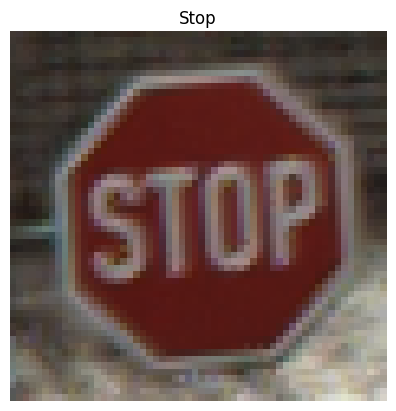

In [13]:
# create a random number
random_nbr = random.randint(1, len(train_data)) # or X.shape[0]

# read the images randomly and plot'm
img = plt.imread(train_data.Path[random_nbr])
print(f'image shape : {img.shape}')
plt.imshow(img)
plt.title(labels[train_data.ClassId[random_nbr]])
plt.axis('off')

In [ ]:
# Split the data into training and validation sets
train_data = train_data.sample(frac=0.8, random_state=0)
valid_data = train_data.drop(train_data.index)

# Preprocess the data
IMG_SIZE = 32
NUM_CLASSES = len(labels)

def preprocess_data(df):
    X = []
    y = []
    for _, row in df.iterrows():
        img = load_img(row.Path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = img_to_array(img) / 255.0
        X.append(img_array)
        y.append(tf.keras.utils.to_categorical(row.ClassId, num_classes=NUM_CLASSES))
    return np.array(X), np.array(y)

X_train, y_train = preprocess_data(train_data)
X_valid, y_valid = preprocess_data(valid_data)
X_test, y_test = preprocess_data(test_data)

In [15]:
# Define the model architecture
model_2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

In [16]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 64)          7

In [17]:
model_2.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
# fit the model
history_2 = model_2.fit(X_train, 
                        y_train, 
                        epochs=5, 
                        validation_data=(X_valid, y_valid))

Epoch 1/5
981/981 [==============================] - 15s 5ms/step - loss: 1.2031 - accuracy: 0.6464
Epoch 2/5
981/981 [==============================] - 5s 5ms/step - loss: 0.1930 - accuracy: 0.9408
Epoch 3/5
981/981 [==============================] - 4s 5ms/step - loss: 0.0963 - accuracy: 0.9704
Epoch 4/5
594/981 [=================>............] - ETA: 2s - loss: 0.0653 - accuracy: 0.9801

In [ ]:
model_2.evaluate(X_test, y_test)

In [ ]:
pd.DataFrame(history_2.history).plot()

In [ ]:
# Get 12 random numbers
rand_img = random.sample(range(len(X_test)), 12)

# Get the predicted labels for the test data
y_pred = model_2.predict(X_test)

# Plot the images and the predicted labels
fig, axs = plt.subplots(3, 4, figsize=(20, 12))
axs = axs.ravel()
for i in range(12):
  # Plot the image
  axs[i].imshow(X_test[rand_img[i]], cmap=plt.cm.binary)

  # Get the predicted and actual label indices
  pred_label = np.argmax(y_pred[rand_img[i]])
  true_label = np.argmax(y_test[rand_img[i]])

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
     color = "green"
  else:
     color = "red"

  # Set the label text
  axs[i].set_title("Pred: {} {:2.0f}% \n(True: {})".format(labels[pred_label],
                                                   100*tf.reduce_max(y_pred),
                                                   labels[true_label]),
             color=color) # set the color to green or red
  axs[i].axis('off')
plt.show()